In [1]:
import os
from dotenv import load_dotenv
from qiskit import *
from qiskit_ibm_provider import IBMProvider

In [2]:
# Load environment variables from .env file
load_dotenv()
api_key = os.getenv('QISKIT_API_KEY')

IBMProvider.save_account(token=api_key, overwrite=True)

In [3]:
provider = IBMProvider()
provider.backends()

[<IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_statevector')>]

In [4]:
qr = QuantumRegister(2)

cr = ClassicalRegister(2)

In [5]:
circuit = QuantumCircuit(qr, cr)

In [6]:
%matplotlib inline

In [7]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [8]:
# Apply Hadamard Gate (H) to bring Qubit 0 into super position
circuit.h(qr[0])

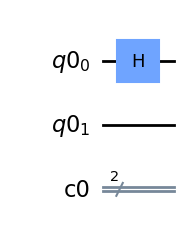

In [9]:
circuit.draw(output='mpl')

In [10]:
# Apply a controlled not (CNOT) to bring Qubit 0 and 1 into entanglement
circuit.cx(qr[0], qr[1])

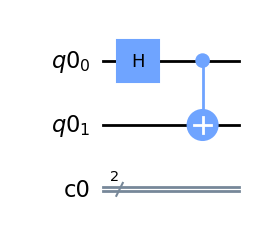

In [11]:
circuit.draw(output='mpl')

In [12]:
# Measure the qubits and store the probabilities into the classical registers
circuit.measure(qr, cr)

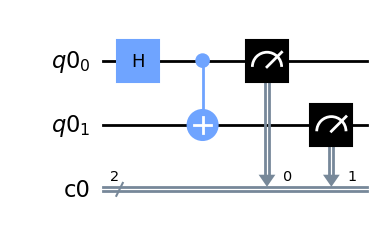

In [13]:
circuit.draw(output='mpl')

In [14]:
qcomp = provider.get_backend("ibm_brisbane")
qcomp

<IBMBackend('ibm_brisbane')>

In [15]:
job = execute(circuit, backend=qcomp)

In [16]:
from qiskit.tools.monitor import job_monitor

In [17]:
job_monitor(job)

Job Status: job has successfully run


In [18]:
result = job.result()

In [19]:
from qiskit.tools.visualization import plot_histogram

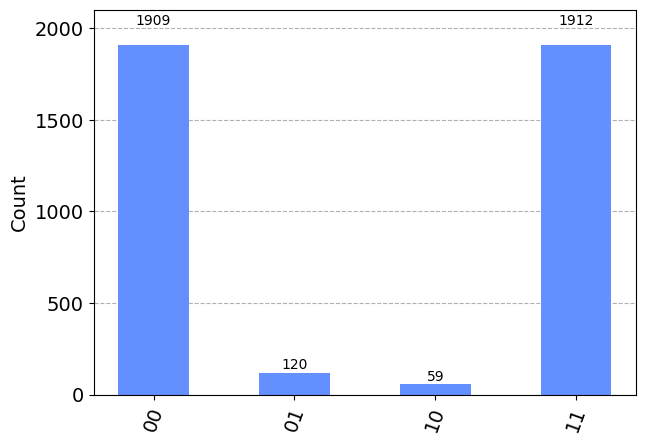

In [20]:
plot_histogram(result.get_counts(circuit))